# Arboles de Decisión

## Miguel Ángel Villamil Huertas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [85]:
data = pd.read_csv("winequality-red.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [87]:
data.shape

(1599, 12)

In [89]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='density', ylabel='chlorides'>

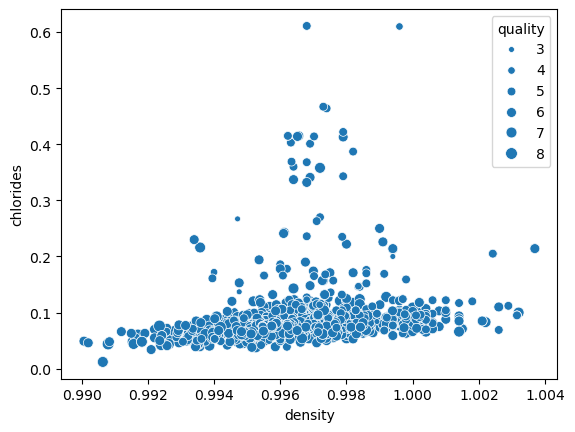

In [97]:
sns.scatterplot(x = "density", y = "chlorides", size = "quality", data = data)

In [91]:
data.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

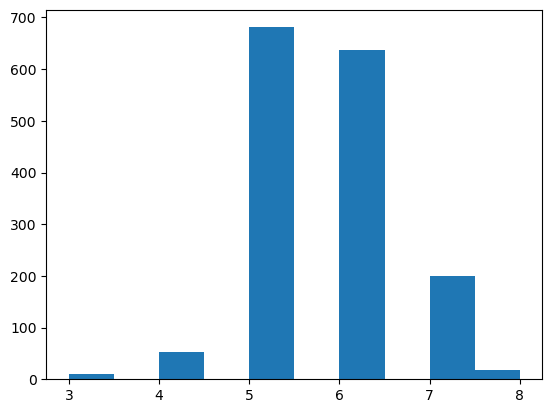

In [93]:
plt.hist(data.quality)

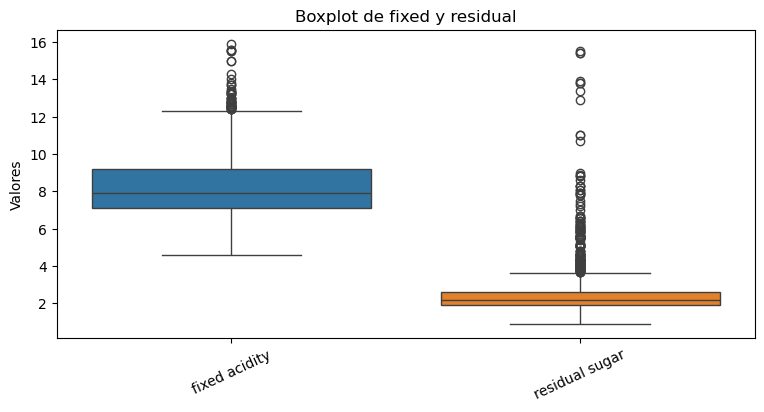

In [163]:
plt.figure(figsize=(9, 4))
sns.boxplot(data=data[["fixed acidity", "residual sugar"]])
plt.xticks(rotation=25)
plt.title('Boxplot de fixed y residual')
plt.ylabel('Valores')
plt.show()

In [111]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar"]
target_col = ['quality']

In [113]:
predictors = data[predictors_col]
target = data[target_col]

In [115]:
predictors


,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.4,0.700,0.00,1.9
1,7.8,0.880,0.00,2.6
2,7.8,0.760,0.04,2.3
3,11.2,0.280,0.56,1.9
4,7.4,0.700,0.00,1.9
...,...,...,...,...
1594,6.2,0.600,0.08,2.0
1595,5.9,0.550,0.10,2.2
1596,6.3,0.510,0.13,2.3
1597,5.9,0.645,0.12,2.0


In [117]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [133]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.6, random_state=15)


In [147]:
arbol = tree.fit(X_train, y_train)

In [155]:
predicciones

array([6, 6, 7, 5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 4, 5, 7, 6, 5,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 7, 7, 7, 5, 7, 6, 6, 7, 6, 5,
       7, 7, 5, 5, 5, 6, 5, 7, 7, 5, 5, 6, 5, 7, 5, 6, 7, 5, 6, 6, 7, 6,
       7, 6, 7, 6, 7, 6, 5, 5, 4, 6, 6, 7, 6, 6, 5, 6, 5, 5, 7, 6, 5, 5,
       5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5,
       6, 7, 5, 6, 5, 5, 7, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 5, 7, 7, 6, 6, 5, 6, 5, 6, 6, 5, 5, 4, 6, 5, 5, 6, 6, 7,
       6, 5, 5, 6, 6, 5, 6, 6, 7, 5, 8, 6, 7, 6, 6, 6, 7, 5, 5, 5, 6, 6,
       6, 7, 8, 7, 5, 6, 6, 6, 6, 5, 5, 7, 5, 6, 6, 7, 7, 6, 6, 6, 7, 6,
       5, 5, 6, 5, 6, 6, 6, 6, 5, 7, 7, 6, 7, 5, 5, 5, 5, 5, 5, 6, 7, 5,
       7, 4, 5, 5, 6, 7, 5, 6, 7, 6, 5, 6, 6, 6, 6, 5, 7, 7, 7, 6, 5, 7,
       6, 6, 5, 5, 7, 5, 6, 4, 6, 5, 7, 7, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5,
       5, 5, 7, 5, 7, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 5, 5, 5, 6, 6, 7, 5, 5, 7, 5, 5, 5, 6, 6,

In [149]:
tree = DecisionTreeClassifier()

[Text(0.3463351404755579, 0.9722222222222222, 'x[1] <= 0.425\ngini = 0.642\nsamples = 639\nvalue = [2, 19, 280, 245, 85, 8]'),
 Text(0.07917109458023379, 0.9166666666666666, 'x[2] <= 0.265\ngini = 0.671\nsamples = 214\nvalue = [0.0, 2.0, 54.0, 93.0, 59.0, 6.0]'),
 Text(0.026567481402763018, 0.8611111111111112, 'x[3] <= 1.95\ngini = 0.53\nsamples = 29\nvalue = [0.0, 0.0, 13.0, 15.0, 1.0, 0.0]'),
 Text(0.011689691817215728, 0.8055555555555556, 'x[2] <= 0.07\ngini = 0.379\nsamples = 13\nvalue = [0, 0, 10, 2, 1, 0]'),
 Text(0.007438894792773645, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.015940488841657812, 0.75, 'x[0] <= 6.2\ngini = 0.165\nsamples = 11\nvalue = [0, 0, 10, 0, 1, 0]'),
 Text(0.011689691817215728, 0.6944444444444444, 'x[1] <= 0.39\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 0, 1, 0]'),
 Text(0.007438894792773645, 0.6388888888888888, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.015940488841657812, 0.6388888888888888, 'gini = 0.0

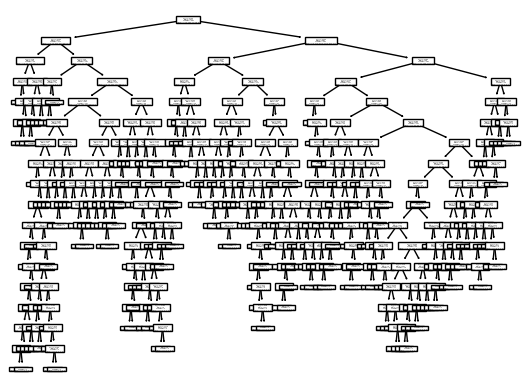

In [151]:
plot_tree(arbol)

In [153]:
predicciones = arbol.predict(X_test)

In [157]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.496875

In [119]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar
fixed acidity,1.000000,-0.256131,0.671703,0.114777
volatile acidity,-0.256131,1.000000,-0.552496,0.001918
citric acid,0.671703,-0.552496,1.000000,0.143577
residual sugar,0.114777,0.001918,0.143577,1.000000


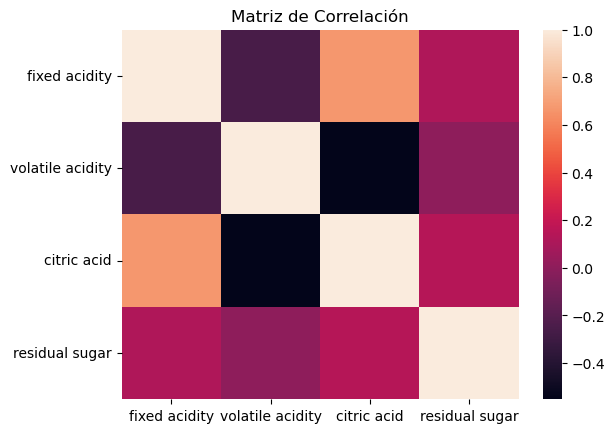

In [159]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()